In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
sns.set()
plt.rcParams['figure.figsize'] = [20,9] 

In [2]:
df= pd.read_csv("/content/time series task1.csv")
df.head(15)

,A,B
0,183039,190605
1,183039,190605
2,183112,190151
3,183179,189470
4,183248,189260
5,183327,189282
6,183401,189385
7,183473,189535
8,183539,189736
9,183539,189940


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   A       499 non-null    int64
 1   B       499 non-null    int64
dtypes: int64(2)
memory usage: 7.9 KB


In [4]:
df.describe()

,A,B
count,499.000000,499.000000
mean,183431.987976,189656.695391
std,492.301724,510.926884
min,182142.000000,188324.000000
25%,183068.000000,189344.500000
50%,183457.000000,189712.000000
75%,183815.500000,190047.000000
max,184584.000000,190663.000000


comparison of the two columns :

<Axes: >

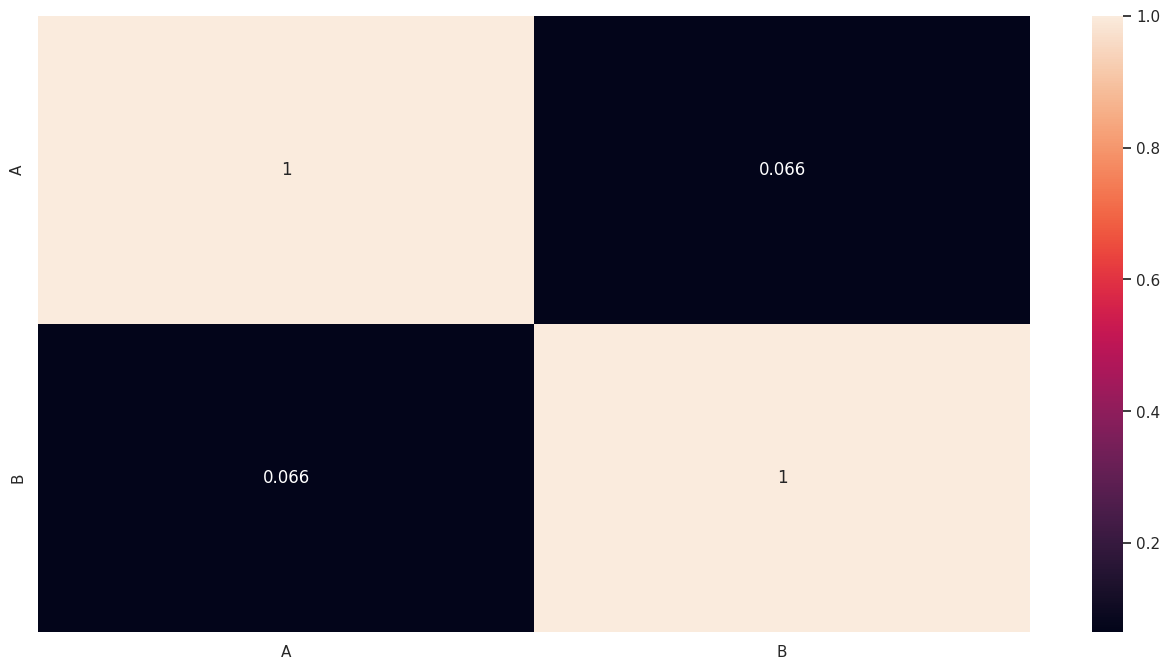

In [5]:
fig = plt.figure(figsize = (16,8))
sns.heatmap(df.corr(), annot = True)

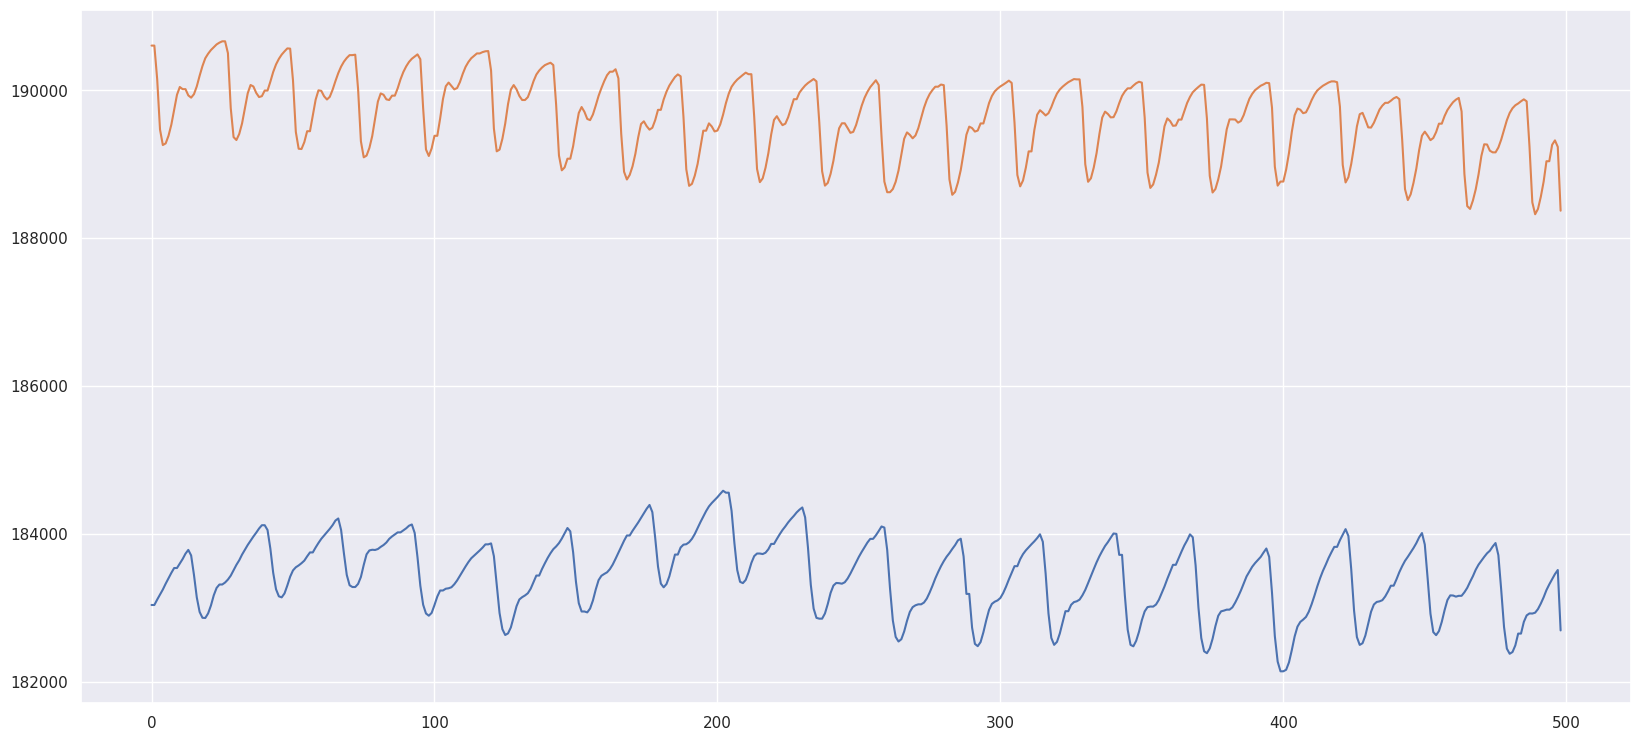

In [6]:
# we can see that the values of two columns are different for same length.

plt.plot(df)
plt.show()

In [7]:
import plotly.express as px

fig = px.line(df.B)

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

Here,
  the orange color line plot is column "B"
  the Blue color line plot is column "A".

from this graph, we can see there is not breakage of graph. so there is no null values in this data.



====================================================================================================

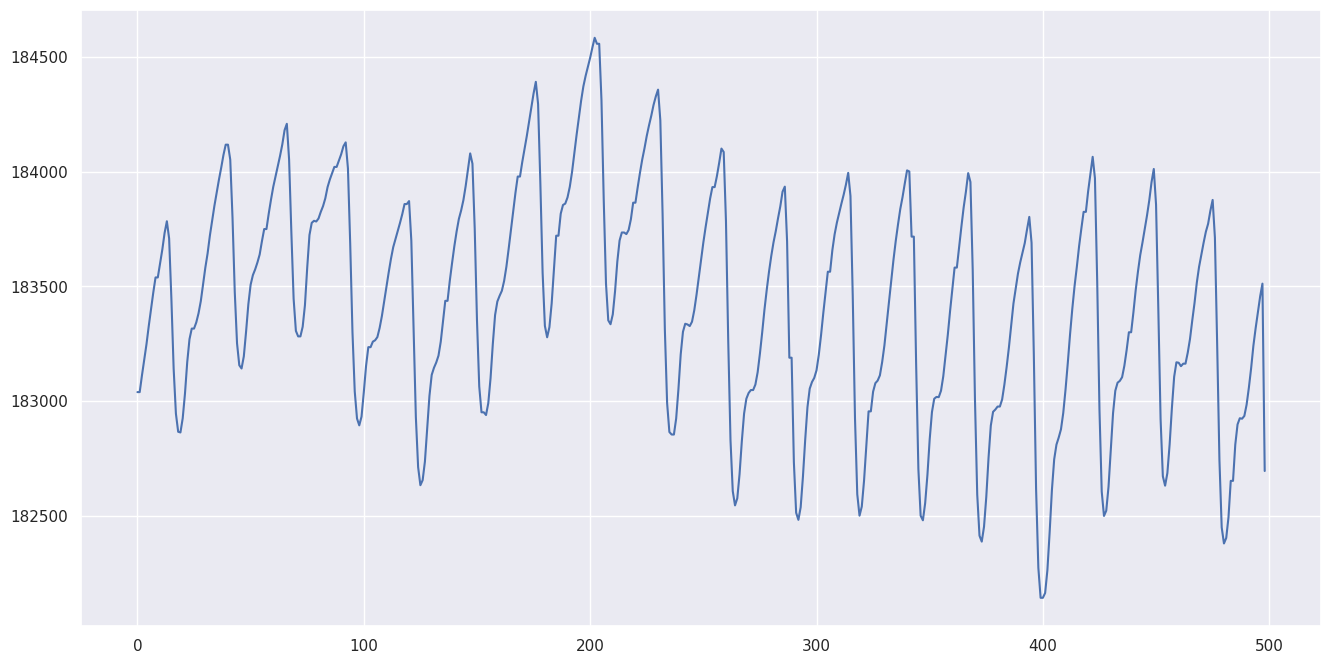

In [8]:
fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot()

ax.plot(df['A']) #,color='green', linestyle='dashed', linewidth = 1,marker='o', markerfacecolor='blue', markersize=2)
plt.show()

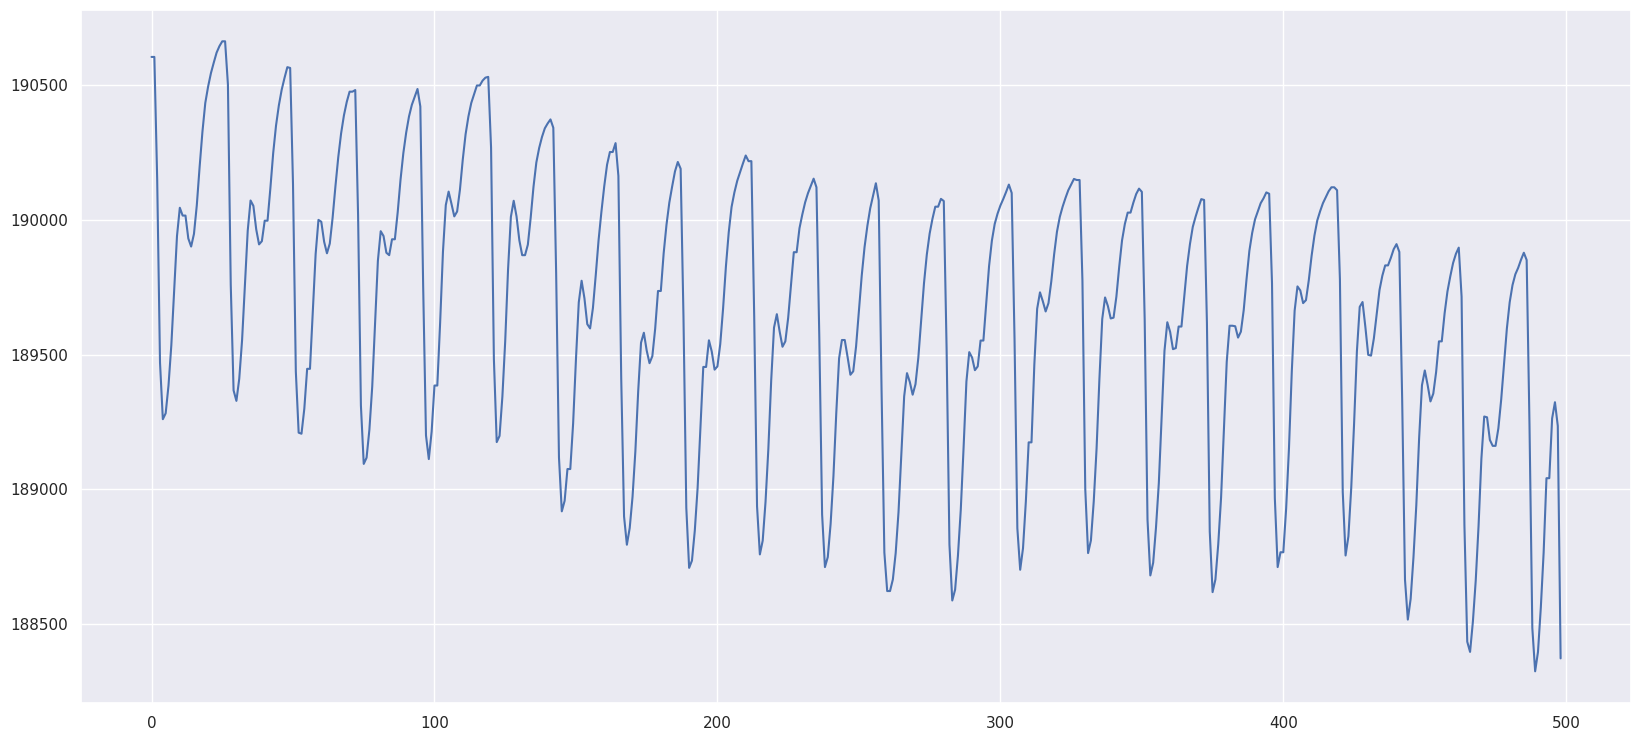

In [9]:
plt.plot(df['B'])
plt.show()

observation from graph A and graph B : 

graph A : difference between the each fluctuation are very small, sometimes it is equal.

graph B : difference between each flluctuation are large, and also has few equal values.

==============================================================================================

## 1. Sub-Task : 
Finding the local Maxima, Local Minima, Global Maxima and Global Minima. 
Also finding the range of the individual plot in the original graph.



### Global and Local Minima and Maxima:

  A global maximum point refers to the point with the largest - value on the graph, when a largest - value exists.

  A global minimum point refers to the point with the smallest value.

  Global maximum is unique while the local maximaum is not. There may be more than one local maxima.

  Local maximum is the greatest element in a subset or a given range of a function.
  
  Local minimum is the smallest element in a subset or a given range of a function.

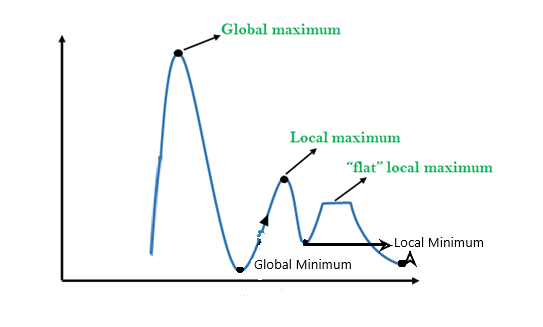

In [10]:
# define a function that takes a list of numbers as input
def Golbal_Local_optima(channel):
    i = 1
    GMinima,GMaxima,LMinima,LMaxima = [],[],[],[]  # create an empty list to store the local extrema
    len_c = len(channel)
    
    # for 0th index
    if channel[0] <= channel[1]:
        # print("inside 1st if",np.argmin(channel[0:10]))
        if 0 == np.argmin(channel[0:10]):
            # print("inside 2nd if")
            GMinima.append(0)

    # loop through the numbers in the list
    while i < len_c-1:
        start = (i-10 if i-10 >= 0 else 0)  # starting from the first ten number
        end = (i+10 if i+10 <= len_c else len_c)  # endind from the next ten numbers, totaly we hve 20 number range from star and end

        # MINIMA
        # check if the current number is less than the number before it and the number after it
        if channel[i] <= channel[i+1] and channel[i] <= channel[i-1]:
            # if so, append the current number to the list of local extrema as a local minima

            # check if the number is smallest from the range of start and end using argmin function

            if i== start+np.argmin(channel[start:end]) :
              
                # if so, append the current number to the list of local extrema as a local minima
                GMinima.append(i)
            else:
                LMinima.append(i)
    
        # MAXIMA
        # check if the current number is greater than the number before it and the number after it
        if channel[i] >= channel[i+1] and channel[i] > channel[i-1]: 
            # if so, append the current number to the list of local extrema as a local maxima
            
            # check if the number is greatest from the range of start and end using argmax function
            if i== start+np.argmax(channel[start:end]) :
                # if so, append the current number to the list of GMaxima.
                GMaxima.append(i)
            else:
                LMaxima.append(i)

        i = i+1 #increment

    individual_wavelet=[]  # individual beats
    i=0
    while i+2<=len(GMinima):
        individual_wavelet.append(GMinima[i:i+2])  # append the two consecutive pair of GMinima
        i+=1  # increment
    # return the list of Golbal_Local_optima
    return individual_wavelet,GMinima,GMaxima,LMinima,LMaxima
    # return a,b,c,d,e

In [11]:
# # test the function with column A
# channel = df.A
# individual_fluct,GMinima,GMaxima,LMinima,LMaxima = Golbal_Local_optima(channel)

In [12]:
# # test the function with column B
channel = df.B
individual_wavelet, GMinima,GMaxima,LMinima,LMaxima = Golbal_Local_optima(channel)

In [13]:
print(GMaxima)

[25, 48, 72, 94, 119, 141, 164, 186, 210, 234, 256, 279, 303, 326, 349, 371, 394, 417, 440, 462, 485]


In [14]:
print(GMinima)

[4, 30, 53, 75, 98, 122, 145, 168, 190, 215, 238, 260, 283, 307, 331, 353, 375, 398, 422, 444, 466, 489]


In [15]:
print(LMaxima)

[10, 35, 40, 55, 59, 70, 81, 85, 100, 105, 115, 128, 147, 152, 162, 174, 179, 195, 197, 221, 227, 244, 267, 277, 289, 293, 310, 314, 337, 345, 359, 363, 381, 399, 405, 428, 436, 450, 455, 471, 493, 496]


In [16]:
print(LMinima)

[11, 14, 38, 41, 56, 62, 71, 84, 86, 101, 107, 116, 131, 132, 148, 155, 163, 176, 180, 196, 199, 211, 223, 228, 247, 261, 269, 278, 291, 294, 311, 316, 327, 339, 346, 361, 364, 384, 400, 407, 431, 437, 452, 456, 474, 475, 494]


In [17]:
print(individual_wavelet)

[[4, 30], [30, 53], [53, 75], [75, 98], [98, 122], [122, 145], [145, 168], [168, 190], [190, 215], [215, 238], [238, 260], [260, 283], [283, 307], [307, 331], [331, 353], [353, 375], [375, 398], [398, 422], [422, 444], [444, 466], [466, 489]]


In [18]:
#df.A.loc[259:263]

=========================================================================================================

Plotting the Global and Local Minima and Maxima values.

In [19]:
# ploting the Column "A"

In [20]:
# plt.plot(df.A)  # 'o : r' , ls = ":"

# #for i in LMinima:
# plt.plot(LMinima, df.A[LMinima], '*', color = 'Red', label = "Local Minima")
  
# #for j in LMaxima:
# plt.plot(LMaxima, df.A[LMaxima], '*', color = 'Blue', label = "Local Maxima")

# #for l in GMaxima:
# plt.plot(GMaxima, df.A[GMaxima], '*', color = 'Brown', label = 'Global Maxima')

# #for k in GMinima:
# plt.plot(GMinima, df.A[GMinima], '*', color = 'Black', label = 'Global Minima')
      
    

# # plt.legend()

In [21]:
#column B

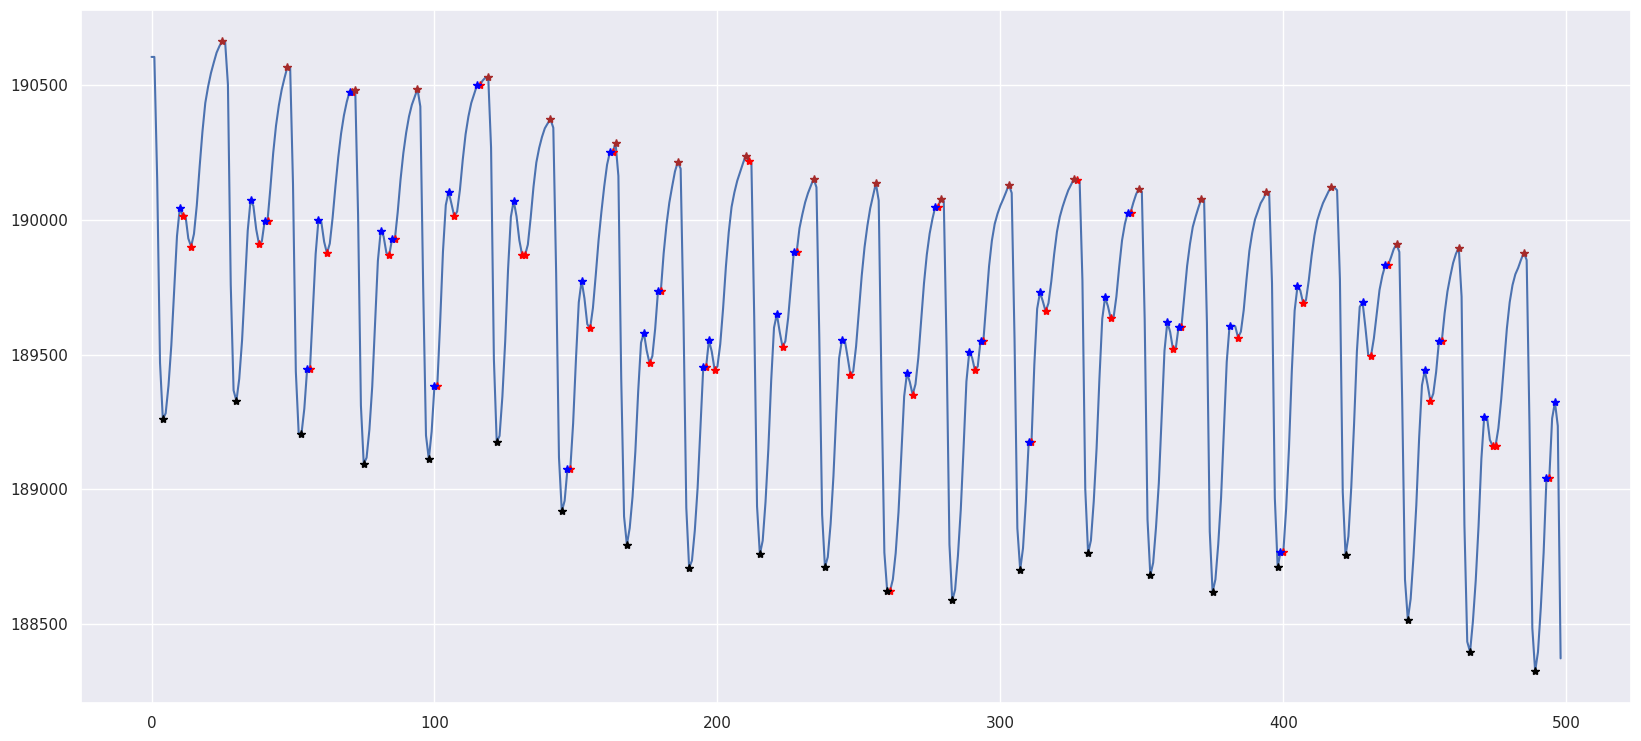

In [22]:
plt.plot(df.B)  # 'o : r' , ls = ":"

#for i in LMinima:
plt.plot(LMinima, df.B[LMinima], '*', color = 'Red', label = "Local MInima")

#for j in LMaxima:
plt.plot(LMaxima, df.B[LMaxima], '*', color = 'Blue', label = "Local Maxima")

#for l in GMaxima:
plt.plot(GMaxima, df.B[GMaxima], '*', color = 'Brown', label = 'Global Maxima')

# for k in GMinima:
plt.plot(GMinima, df.B[GMinima], '*', color = 'Black', label = 'Global Minima')
      
    

plt.show()

## Observation : 

Red dots -- Local Minima

Blue dots -- Local Maxima

Brown dots -- Global Maxima

Black dots -- Global Minima


The Global Minima is the subset of Local Minima  and Global Maxima is the subset of Local Maxima. Thats why the points are pointed in all the edges.

In this graph, we have equal and non-equal LOcal Minima and Local Maxima.
The values of Local Minima and Local maxima has equal values, but different index values which comes one after another -------- Equal-Local_minima_maxima.

The values of Local Minima and Local maxima are not equal------ non-Equal-Local_minima_maxima.


===========================================================================================================
## 2. Sub-Task : 
Finding the number of local minima and maxima between every two consecutive global minima.

In [23]:
# column A

In [24]:
individual_wavelet # values every two consecutive Global Minima 

[[4, 30],
 [30, 53],
 [53, 75],
 [75, 98],
 [98, 122],
 [122, 145],
 [145, 168],
 [168, 190],
 [190, 215],
 [215, 238],
 [238, 260],
 [260, 283],
 [283, 307],
 [307, 331],
 [331, 353],
 [353, 375],
 [375, 398],
 [398, 422],
 [422, 444],
 [444, 466],
 [466, 489]]

In [25]:
len(individual_wavelet)

21

Local Maxima presents between every two consecutive Global Minima

In [26]:
def sm(ind_flt,LMax):
  Local_maxima_count_lis = []

  for i in ind_flt:
      Local_maxima_count=0
      for j in LMax:
          if j >= i[0] and j<=i[1]: # Local maxima presents between two individual fluct. 
              Local_maxima_count += 1
      Local_maxima_count_lis.append(Local_maxima_count)
      # print("Pair ",i," : ", Local_maxima_count)
  return Local_maxima_count_lis

ind_flt_LMax = sm(individual_wavelet,LMaxima)



Local Minima presents between every two consecutive Global Minima

In [27]:
ind_flt_LMin = sm(individual_wavelet,LMinima)



In [28]:
# create a dataframe for each Local minima and maxima, individual fluct

In [29]:
df_1 = pd.DataFrame({'individual_fluct': individual_wavelet})
df_2 = pd.DataFrame({'Local_maxima_count_lis': ind_flt_LMax})
df_3 = pd.DataFrame({'Local_minima_count_lis': ind_flt_LMin})

In [30]:
res = [df_1,df_2,df_3]
result = pd.concat(res,axis = 1)
result=result.sort_values(by = ['Local_maxima_count_lis','Local_minima_count_lis'], ascending = [True, False])
result

,individual_fluct,Local_maxima_count_lis,Local_minima_count_lis
0,"[4, 30]",1,2
5,"[122, 145]",1,2
20,"[466, 489]",1,2
10,"[238, 260]",1,1
16,"[375, 398]",1,1
8,"[190, 215]",2,3
11,"[260, 283]",2,3
13,"[307, 331]",2,3
1,"[30, 53]",2,2
3,"[75, 98]",2,2


In [31]:
# no of 1s in both Local minima and maxima and its count

In [32]:
count_select_data = result.loc[(result['Local_maxima_count_lis']==1) & (result['Local_minima_count_lis']==1)]
count_select_data

,individual_fluct,Local_maxima_count_lis,Local_minima_count_lis
10,"[238, 260]",1,1
16,"[375, 398]",1,1


In [33]:
count_select_data.count()

individual_fluct          2
Local_maxima_count_lis    2
Local_minima_count_lis    2
dtype: int64

In [34]:
len(result)


21

In [35]:
# total no of individual wavelet is 18. then the 90% of individual wavelet is 

ninty_percent_data= int((95/100)*len(result))  
print(ninty_percent_data)


19


In [36]:
# ploting all the LOcal and Gloal Maxima and Minima in each individual plots of Column "A"

In [37]:
# plt.plot(df.A)

# ##for i in LMinima:
# plt.plot(LMinima, df.A[LMinima], '*', color = 'Red', label = 'Local Minima')

# ##for j in LMaxima:
# plt.plot(LMaxima, df.A[LMaxima], '*', color = 'Blue', label = 'Local Maxima')

# for i in range(1, len(individual_wavelet)):
#     plt.plot(range(individual_wavelet[i][0], individual_wavelet[i][1]),df.A.values[individual_wavelet[i][0]:individual_wavelet[i][1]])
    
# plt.show()

In [38]:
# column B

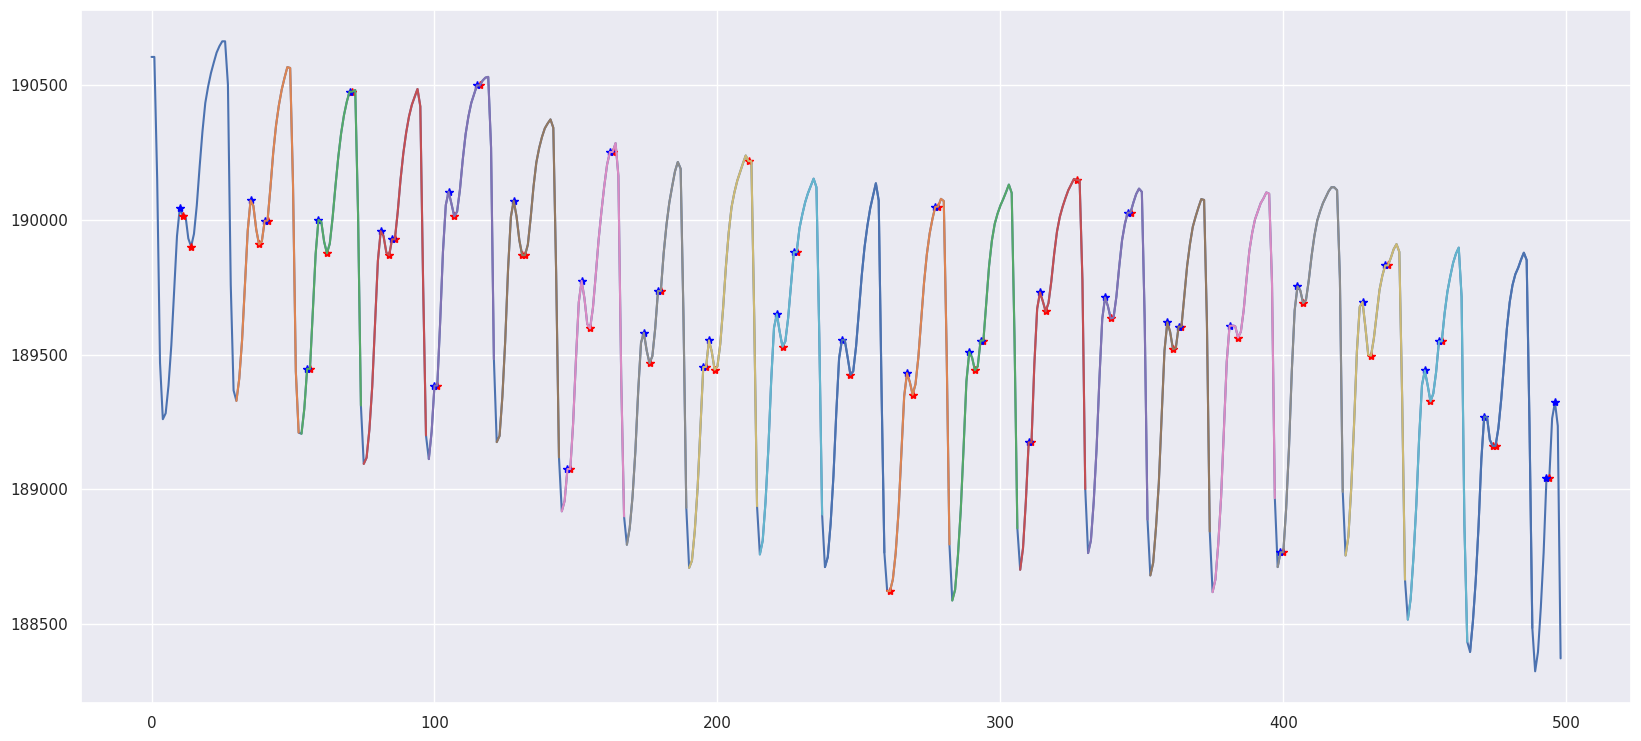

In [39]:
plt.plot(df.B)

#for i in LMinima:
plt.plot(LMinima, df.B[LMinima], '*', color = 'Red', label = 'Local Minima')

#for j in LMaxima:
plt.plot(LMaxima, df.B[LMaxima], '*', color = 'Blue', label = 'Local Maxima')

for i in range(1, len(individual_wavelet)):
    plt.plot(range(individual_wavelet[i][0], individual_wavelet[i][1]),df.B.values[individual_wavelet[i][0]:individual_wavelet[i][1]])
    
plt.show()

## Observations :

Two blue dots and Red dots are pointed in few individual beats. it means, we can see two Local Minima and Local Maxima in few individual beats, which are colored differently.

From this graph we can see, more than one Local Minima and Maxima are presents between   every two consecutive Global Minima. 

Also, we can see no. of individual fluct, with number of Local minima and Local maxima presents in each fluct. 

there are only 6 fluct, which has one local minima and local maxima.

==============================================================================================

## 3. Sub-Task : 
If there are more then one Local Minima and Local Maxima between two consecutive Global minima, then reduce it to one by Smoothening the graph 

In [40]:
# column A

In [41]:
# smoothening values of column "A"

smoothening by using rolling_window = **4**

In [42]:
smoothening_4=df['B'].rolling(window=4).mean()
smoothening_4.head()

0          NaN
1          NaN
2          NaN
3    190207.75
4    189871.50
Name: B, dtype: float64

Rolling : moving by revolving or turning over and over. raising and falling in gentle slopes.

window : to predict the next time step.

[]

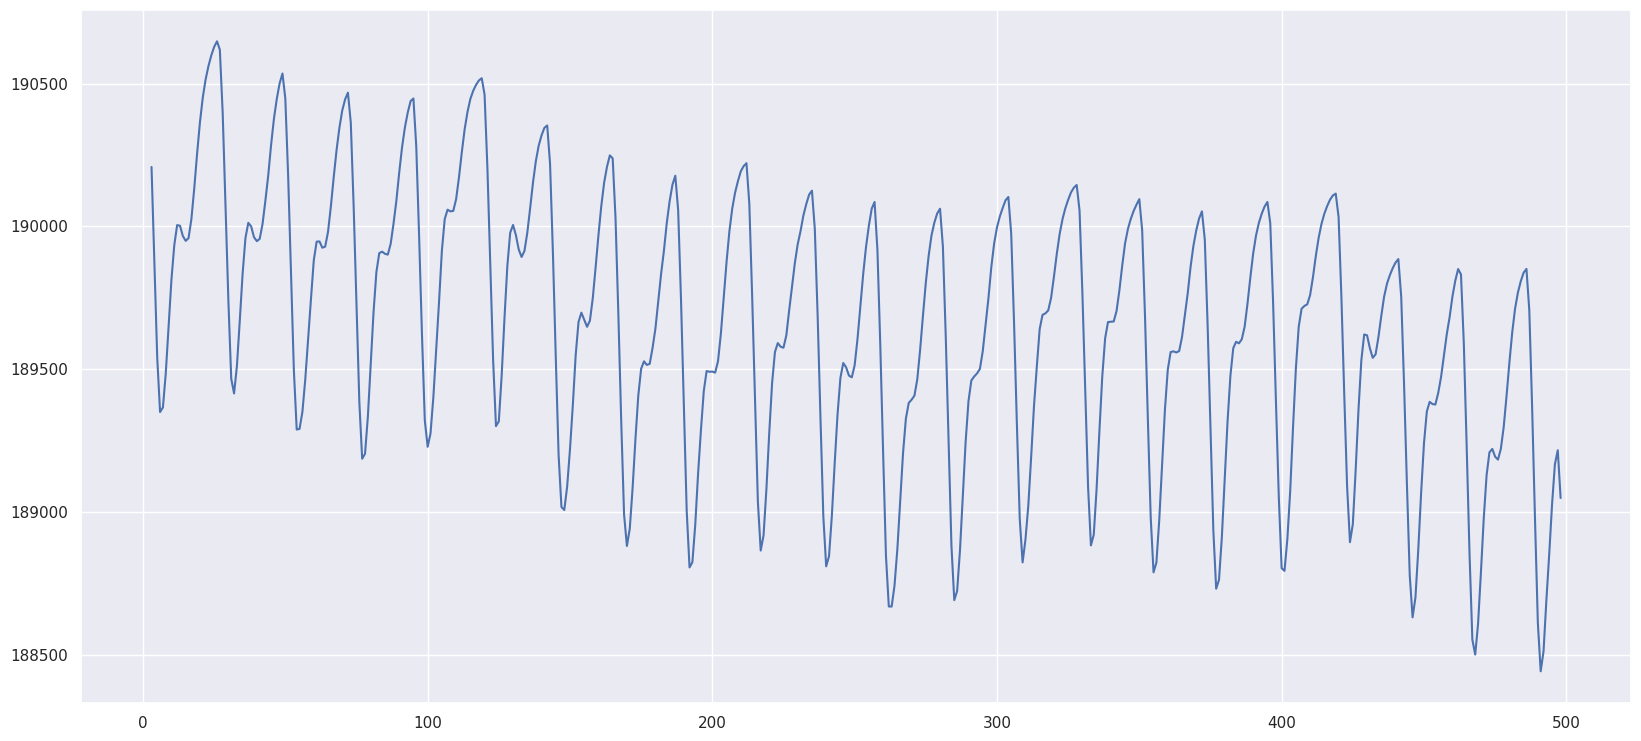

In [43]:
#plotting the graph 
plt.plot(smoothening_4)
plt.plot()

In [44]:
channel = smoothening_4
individual_wavelet_s4, GMinima_s4, GMaxima_s4, LMinima_s4, LMaxima_s4 = Golbal_Local_optima(channel)


In [45]:
print(individual_wavelet_s4)

[[6, 32], [32, 54], [54, 77], [77, 100], [100, 124], [124, 148], [148, 170], [170, 192], [192, 217], [217, 240], [240, 263], [263, 285], [285, 309], [309, 333], [333, 355], [355, 377], [377, 401], [401, 424], [424, 446], [446, 468], [468, 491]]


In [46]:
print(GMinima_s4)
#[0, 19, 46, 71, 98, 125, 154, 181, 209, 236, 264, 292, 319, 347, 373, 399, 427, 454, 480]

[6, 32, 54, 77, 100, 124, 148, 170, 192, 217, 240, 263, 285, 309, 333, 355, 377, 401, 424, 446, 468, 491]


In [47]:
print(GMaxima_s4)
#[13, 39, 66, 92, 120, 147, 176, 202, 230, 258, 286, 314, 340, 367, 394, 422, 449, 475, 497]

[26, 49, 72, 95, 119, 142, 164, 187, 212, 235, 257, 280, 304, 328, 350, 372, 395, 419, 441, 462, 486]


In [48]:
print(LMinima_s4)
#[1, 9, 25, 57, 72, 79, 88, 103, 119, 137, 152, 169, 186, 203, 216, 220, 237, 244, 255, 272, 288, 306, 324, 342, 354, 362, 381, 400, 419, 439, 461, 463, 484, 488]

[15, 40, 63, 86, 108, 133, 156, 177, 199, 201, 225, 249, 363, 385, 432, 454, 476]


In [49]:
print(LMaxima_s4)
#[8, 24, 56, 78, 87, 102, 118, 136, 168, 185, 214, 219, 242, 254, 271, 305, 323, 353, 361, 380, 418, 438, 459, 462, 483, 487]

[12, 37, 62, 84, 107, 130, 154, 176, 198, 200, 223, 246, 362, 384, 429, 452, 474, 497]


In [50]:
# comparing the graph from column "A" with soothening_4

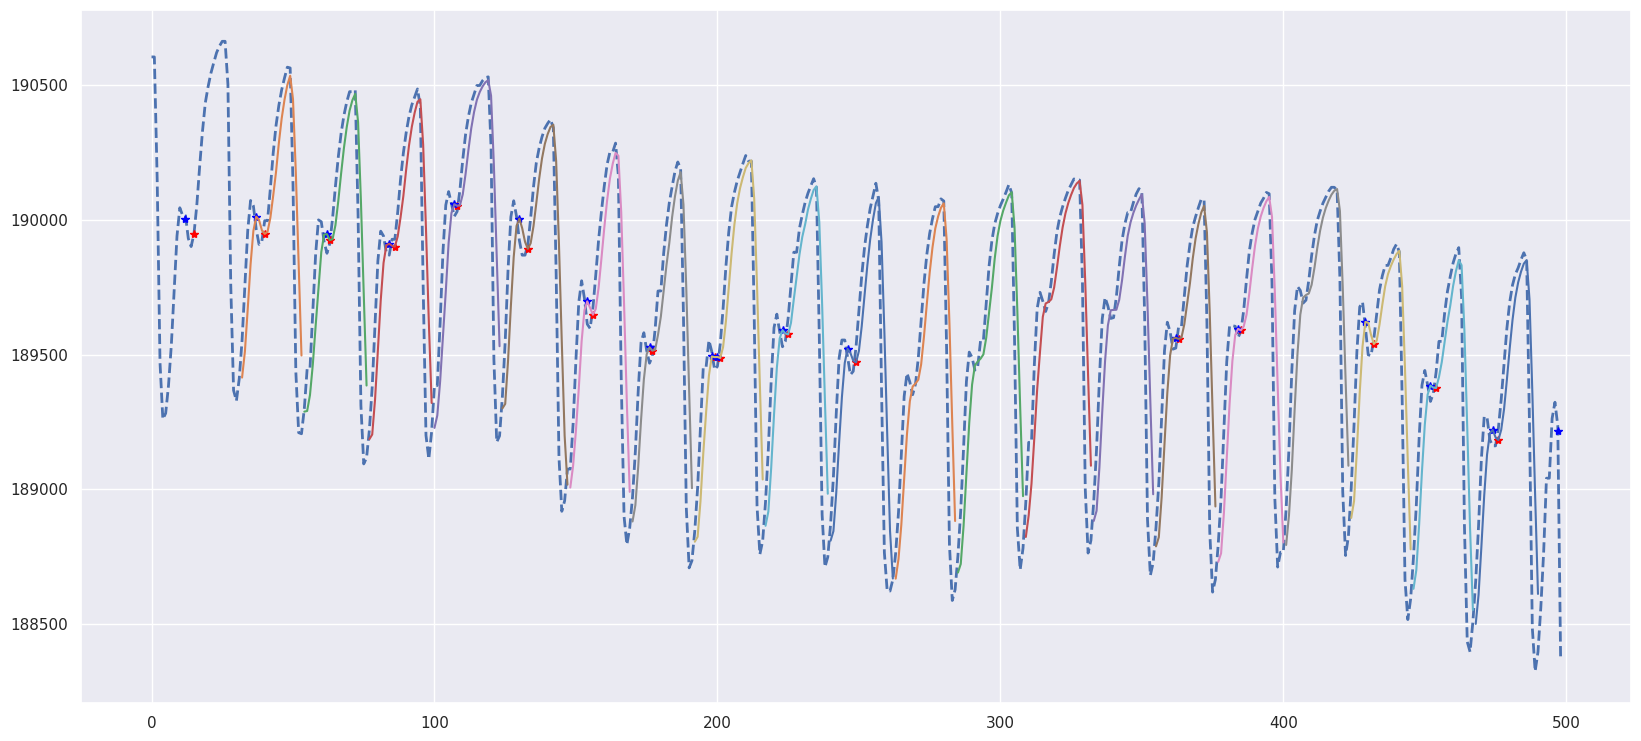

In [51]:
plt.plot(df['B'], linestyle='dashed', linewidth = 2) #marker='o', markerfacecolor='violet', markersize=2

#for i in LMinima:
plt.plot(LMinima_s4, smoothening_4[LMinima_s4], '*', color = 'Red')

#for j in LMaxima:
plt.plot(LMaxima_s4, smoothening_4[LMaxima_s4], '*', color = 'Blue')

for i in range(1, len(individual_wavelet_s4)):
    plt.plot(range(individual_wavelet_s4[i][0], individual_wavelet_s4[i][1]),smoothening_4.values[individual_wavelet_s4[i][0]:individual_wavelet_s4[i][1]])

#plt.plot(df['A'], linestyle='dashed', linewidth = 2) #marker='o', markerfacecolor='violet', markersize=2


Count of Local Maxima and Local Minima Present in every two Consecutive Global Minima 

In [52]:
smoothen_LMAX_4 = sm(individual_wavelet_s4, LMaxima_s4 )
smoothen_LMAX_4

[1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1]

In [53]:
smoothen_LMIN_4 = sm(individual_wavelet_s4, LMinima_s4 )
smoothen_LMIN_4

[1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1]

In [54]:
#creating the dataframe
df_sw1_1 = pd.DataFrame({'individual_wavelet': individual_wavelet_s4})
df_sw1_2 = pd.DataFrame({'Local_Maxima_fluct': smoothen_LMAX_4})
df_sw1_3 = pd.DataFrame({'Local_minima_fluct': smoothen_LMIN_4})

In [55]:
smothen_ind_4 = [df_sw1_1, df_sw1_2, df_sw1_3]
smothen_ind_flt_4 = pd.concat(smothen_ind_4,axis = 1)
smothen_ind_flt_4

,individual_wavelet,Local_Maxima_fluct,Local_minima_fluct
0,"[6, 32]",1,1
1,"[32, 54]",1,1
2,"[54, 77]",1,1
3,"[77, 100]",1,1
4,"[100, 124]",1,1
5,"[124, 148]",1,1
6,"[148, 170]",1,1
7,"[170, 192]",1,1
8,"[192, 217]",2,2
9,"[217, 240]",1,1


In [56]:
# count of Local minima and maxima presents in smoothening_4

In [57]:
count_select_data_4 = smothen_ind_flt_4.loc[(smothen_ind_flt_4['Local_Maxima_fluct']==1) & (smothen_ind_flt_4['Local_minima_fluct']==1)]
count_select_data_4

,individual_wavelet,Local_Maxima_fluct,Local_minima_fluct
0,"[6, 32]",1,1
1,"[32, 54]",1,1
2,"[54, 77]",1,1
3,"[77, 100]",1,1
4,"[100, 124]",1,1
5,"[124, 148]",1,1
6,"[148, 170]",1,1
7,"[170, 192]",1,1
9,"[217, 240]",1,1
10,"[240, 263]",1,1


In [58]:
df_sw1_1.count() # count of individual fluct

individual_wavelet    21
dtype: int64

In [59]:
count_select_data_4.count() # overall individualfluct, no of 1's presents in Local minima and maxima.

individual_wavelet    15
Local_Maxima_fluct    15
Local_minima_fluct    15
dtype: int64

Smoothening by using rolling_window = **3**

In [60]:
smoothening_3=df['B'].rolling(window=3).mean()
smoothening_3.head()

0              NaN
1              NaN
2    190453.666667
3    190075.333333
4    189627.000000
Name: B, dtype: float64

[]

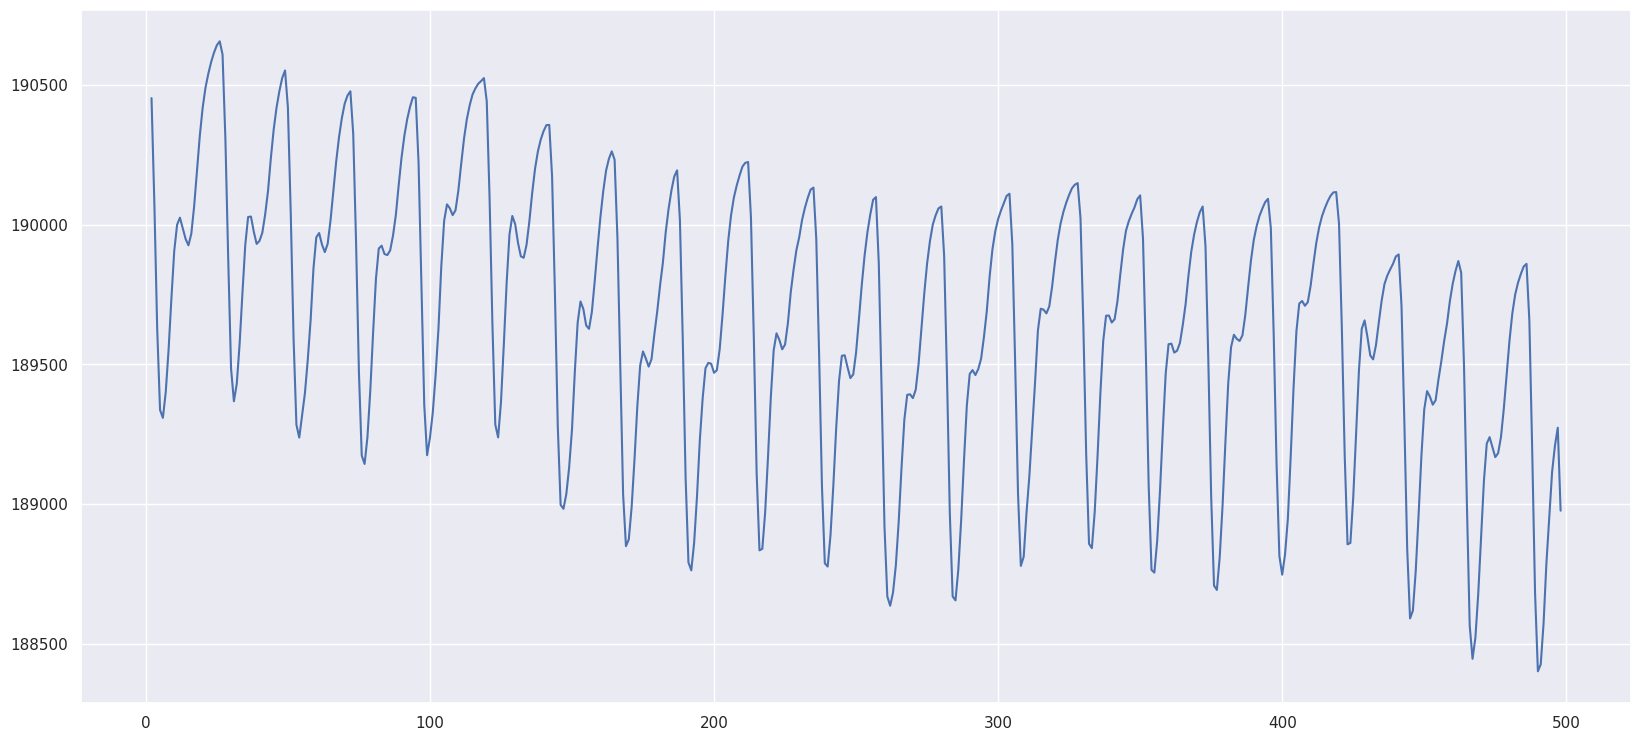

In [61]:
#plotting the graph 
plt.plot(smoothening_3)
plt.plot()

In [62]:
channel = smoothening_3
individual_wavelet_s3, GMinima_s3, GMaxima_s3, LMinima_s3, LMaxima_s3 = Golbal_Local_optima(channel)


In [63]:
print(individual_wavelet_s3)

[[6, 31], [31, 54], [54, 77], [77, 99], [99, 124], [124, 147], [147, 169], [169, 192], [192, 216], [216, 240], [240, 262], [262, 285], [285, 308], [308, 333], [333, 355], [355, 377], [377, 400], [400, 423], [423, 445], [445, 467], [467, 490]]


In [64]:
print(GMinima_s3)
#[0, 19, 46, 71, 98, 125, 154, 181, 209, 236, 264, 292, 319, 347, 373, 399, 427, 454, 480]

[6, 31, 54, 77, 99, 124, 147, 169, 192, 216, 240, 262, 285, 308, 333, 355, 377, 400, 423, 445, 467, 490]


In [65]:
print(GMaxima_s3)
#[13, 39, 66, 92, 120, 147, 176, 202, 230, 258, 286, 314, 340, 367, 394, 422, 449, 475, 497]

[26, 49, 72, 94, 119, 142, 164, 187, 212, 235, 257, 280, 304, 328, 350, 372, 395, 419, 441, 462, 486]


In [66]:
print(LMinima_s3)
#[1, 9, 25, 57, 72, 79, 88, 103, 119, 137, 152, 169, 186, 203, 216, 220, 237, 244, 255, 272, 288, 306, 324, 342, 354, 362, 381, 400, 419, 439, 461, 463, 484, 488]

[15, 39, 63, 85, 108, 133, 156, 177, 200, 224, 248, 270, 292, 317, 340, 362, 385, 408, 432, 453, 475]


In [67]:
print(LMaxima_s3)
#[8, 24, 56, 78, 87, 102, 118, 136, 168, 185, 214, 219, 242, 254, 271, 305, 323, 353, 361, 380, 418, 438, 459, 462, 483, 487]

[12, 37, 61, 83, 106, 129, 153, 175, 198, 222, 246, 269, 291, 315, 339, 361, 383, 407, 429, 451, 473, 497]


In [68]:
# comparing the graph from column "A" with soothening_3

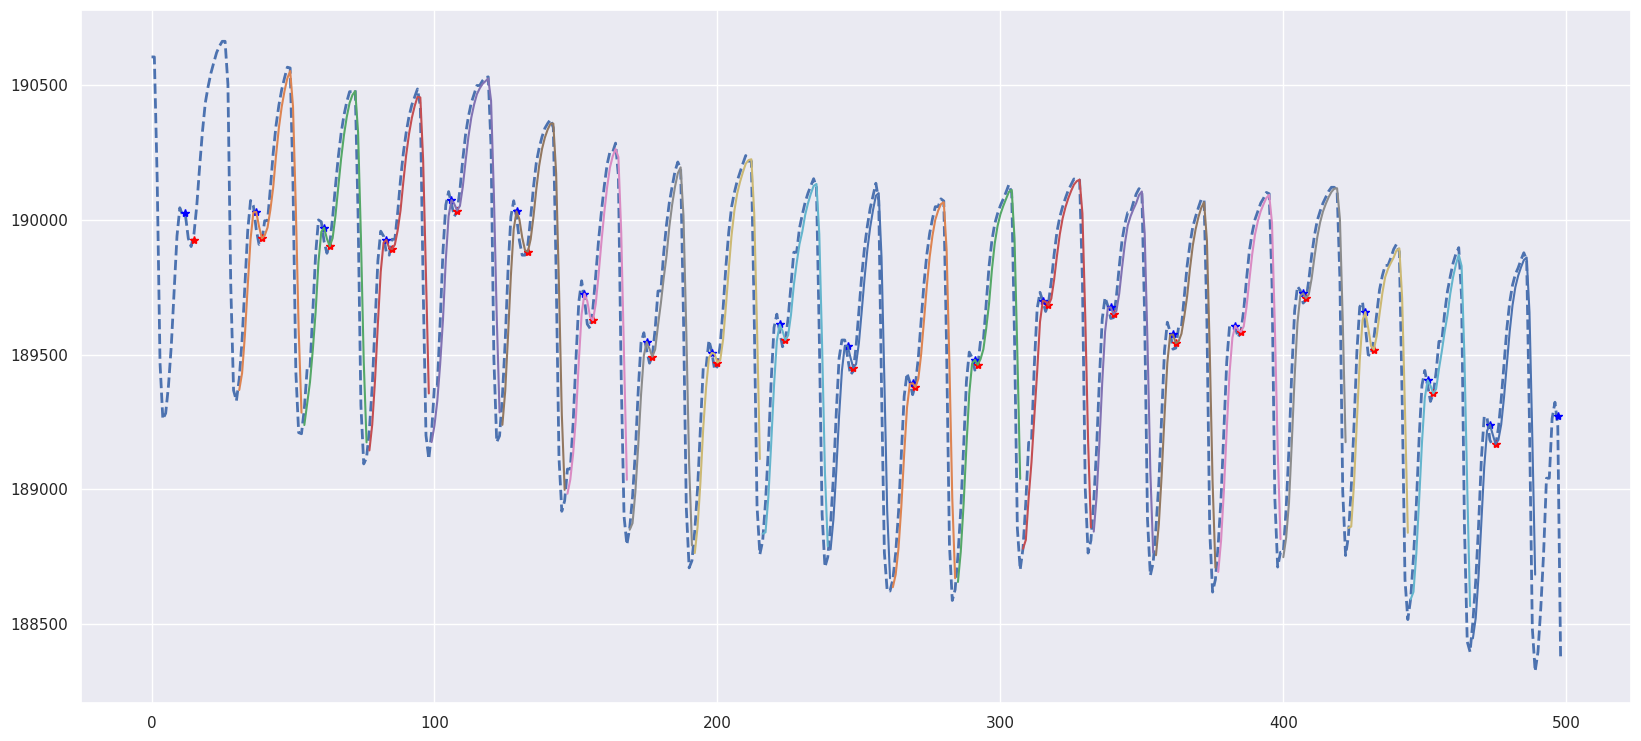

In [69]:
plt.plot(df['B'], linestyle='dashed', linewidth = 2) #marker='o', markerfacecolor='violet', markersize=2

#for i in LMinima:
plt.plot(LMinima_s3, smoothening_3[LMinima_s3], '*', color = 'Red')

#for j in LMaxima:
plt.plot(LMaxima_s3, smoothening_3[LMaxima_s3], '*', color = 'Blue')

for i in range(1, len(individual_wavelet_s3)):
    plt.plot(range(individual_wavelet_s3[i][0], individual_wavelet_s3[i][1]),smoothening_3.values[individual_wavelet_s3[i][0]:individual_wavelet_s3[i][1]])

#plt.plot(df['A'], linestyle='dashed', linewidth = 2) #marker='o', markerfacecolor='violet', markersize=2


In [70]:
smoothen_LMAX_3 = sm(individual_wavelet_s3, LMaxima_s3 )
smoothen_LMAX_3

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [71]:
smoothen_LMIN_3 = sm(individual_wavelet_s3, LMinima_s3 )
smoothen_LMIN_3

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [72]:
df_sw3_1 = pd.DataFrame({'individual_fluct': individual_wavelet_s3})
df_sw3_2 = pd.DataFrame({'Local_Maxima_fluct': smoothen_LMAX_3})
df_sw3_3 = pd.DataFrame({'Local_minima_fluct': smoothen_LMIN_3})

In [73]:
smothen_ind_3 = [df_sw3_1, df_sw3_2, df_sw3_3]
smothen_ind_flt_3 = pd.concat(smothen_ind_3,axis = 1)
smothen_ind_flt_3

,individual_fluct,Local_Maxima_fluct,Local_minima_fluct
0,"[6, 31]",1,1
1,"[31, 54]",1,1
2,"[54, 77]",1,1
3,"[77, 99]",1,1
4,"[99, 124]",1,1
5,"[124, 147]",1,1
6,"[147, 169]",1,1
7,"[169, 192]",1,1
8,"[192, 216]",1,1
9,"[216, 240]",1,1


In [74]:
# count of Local minima and maxima presents in smoothening_4

In [75]:
count_select_data_3 = smothen_ind_flt_3.loc[(smothen_ind_flt_3['Local_Maxima_fluct']==1) & (smothen_ind_flt_3['Local_minima_fluct']==1)]
count_select_data_3

,individual_fluct,Local_Maxima_fluct,Local_minima_fluct
0,"[6, 31]",1,1
1,"[31, 54]",1,1
2,"[54, 77]",1,1
3,"[77, 99]",1,1
4,"[99, 124]",1,1
5,"[124, 147]",1,1
6,"[147, 169]",1,1
7,"[169, 192]",1,1
8,"[192, 216]",1,1
9,"[216, 240]",1,1


In [76]:
df_sw3_1.count() # count of individual fluct

individual_fluct    21
dtype: int64

In [77]:
count_select_data_3.count()

individual_fluct      21
Local_Maxima_fluct    21
Local_minima_fluct    21
dtype: int64

Smoothening by using rolling_window = **2**

In [78]:
smoothening_2=df['B'].rolling(window=2).mean()
smoothening_2.head()

0         NaN
1    190605.0
2    190378.0
3    189810.5
4    189365.0
Name: B, dtype: float64

[]

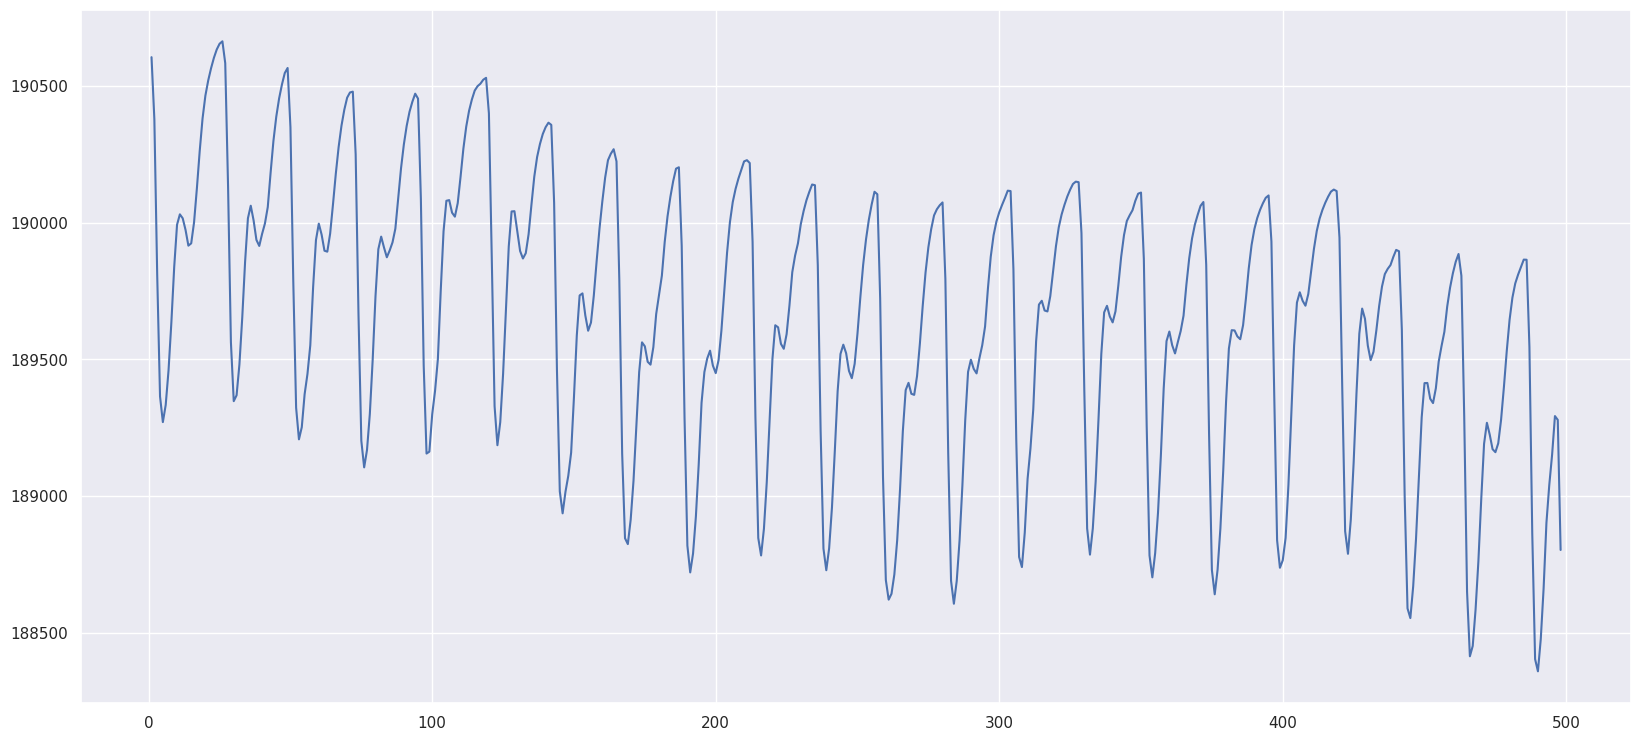

In [79]:
#plotting the graph 
plt.plot(smoothening_2)
plt.plot()

In [80]:
channel = smoothening_2
individual_wavelet_s2, GMinima_s2, GMaxima_s2, LMinima_s2, LMaxima_s2 = Golbal_Local_optima(channel)


In [81]:
print(individual_wavelet_s2)

[[5, 30], [30, 53], [53, 76], [76, 98], [98, 123], [123, 146], [146, 169], [169, 191], [191, 216], [216, 239], [239, 261], [261, 284], [284, 308], [308, 332], [332, 354], [354, 376], [376, 399], [399, 423], [423, 445], [445, 466], [466, 490]]


In [82]:
print(GMinima_s2)
#[0, 19, 46, 71, 98, 125, 154, 181, 209, 236, 264, 292, 319, 347, 373, 399, 427, 454, 480]

[5, 30, 53, 76, 98, 123, 146, 169, 191, 216, 239, 261, 284, 308, 332, 354, 376, 399, 423, 445, 466, 490]


In [83]:
print(GMaxima_s2)
#[13, 39, 66, 92, 120, 147, 176, 202, 230, 258, 286, 314, 340, 367, 394, 422, 449, 475, 497]

[26, 49, 72, 94, 119, 141, 164, 187, 211, 234, 256, 280, 303, 327, 350, 372, 395, 418, 440, 462, 485]


In [84]:
print(LMinima_s2)
#[1, 9, 25, 57, 72, 79, 88, 103, 119, 137, 152, 169, 186, 203, 216, 220, 237, 244, 255, 272, 288, 306, 324, 342, 354, 362, 381, 400, 419, 439, 461, 463, 484, 488]

[14, 39, 63, 84, 108, 132, 155, 177, 200, 224, 248, 270, 292, 317, 340, 362, 385, 408, 431, 453, 475]


In [85]:
print(LMaxima_s2)
#[8, 24, 56, 78, 87, 102, 118, 136, 168, 185, 214, 219, 242, 254, 271, 305, 323, 353, 361, 380, 418, 438, 459, 462, 483, 487]

[11, 36, 60, 82, 106, 129, 153, 174, 198, 221, 245, 268, 290, 315, 338, 360, 382, 406, 428, 451, 472, 496]


In [86]:
# comparing the graph from column "A" with soothening_2

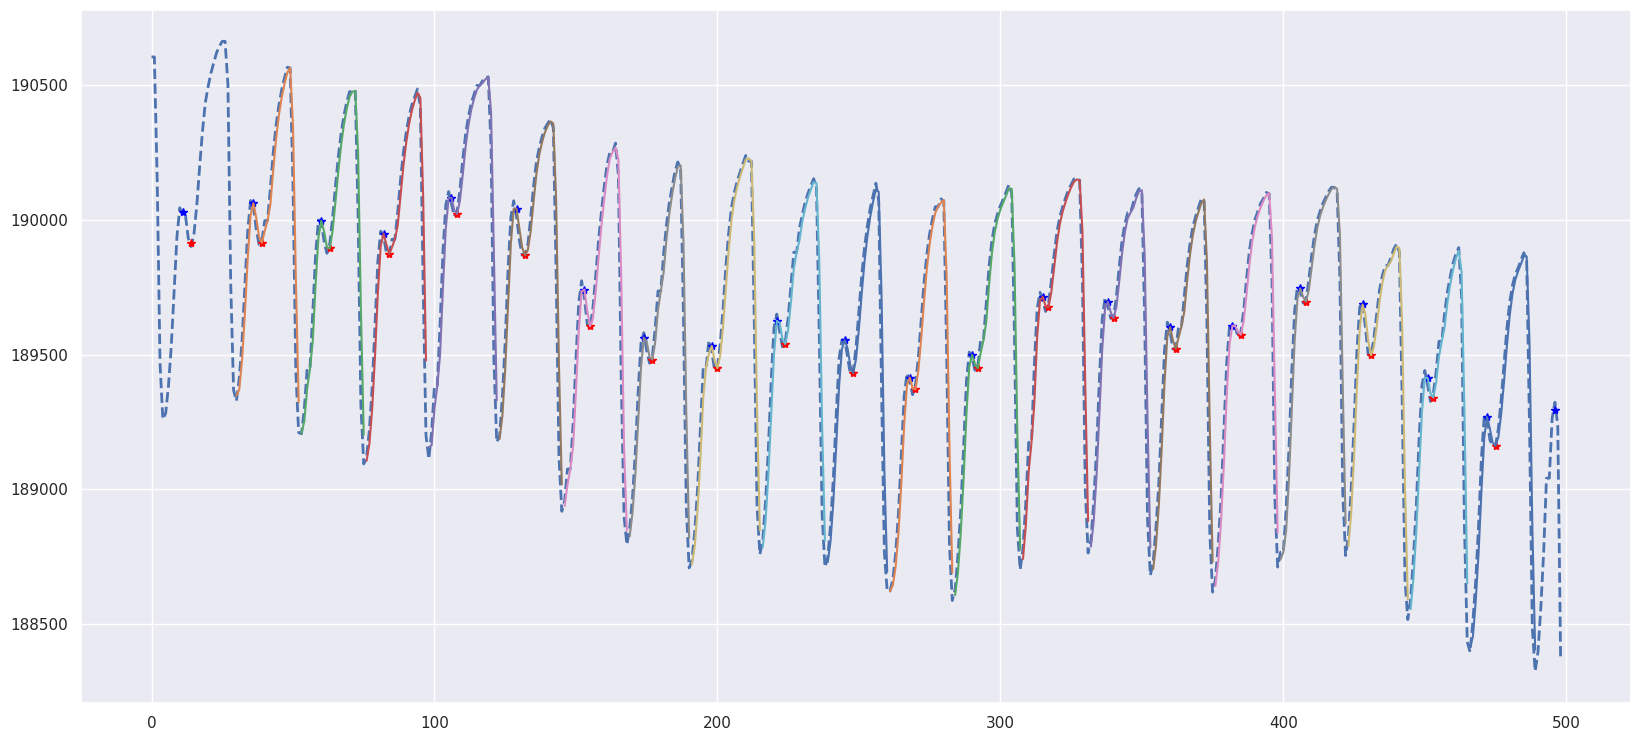

In [87]:
plt.plot(df['B'], linestyle='dashed', linewidth = 2) #marker='o', markerfacecolor='violet', markersize=2

#for i in LMinima:
plt.plot(LMinima_s2, smoothening_2[LMinima_s2], '*', color = 'Red')

#for j in LMaxima:
plt.plot(LMaxima_s2, smoothening_2[LMaxima_s2], '*', color = 'Blue')

for i in range(1, len(individual_wavelet_s2)):
    plt.plot(range(individual_wavelet_s2[i][0], individual_wavelet_s2[i][1]),smoothening_2.values[individual_wavelet_s2[i][0]:individual_wavelet_s2[i][1]])

#plt.plot(df['A'], linestyle='dashed', linewidth = 2) #marker='o', markerfacecolor='violet', markersize=2


In [88]:
smoothen_LMAX_2 = sm(individual_wavelet_s2, LMaxima_s2 )
smoothen_LMAX_2

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [89]:
smoothen_LMIN_2 = sm(individual_wavelet_s2, LMinima_s2 )
smoothen_LMIN_2

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [90]:
# count of Local minima and maxima presents in smoothening_2

In [91]:
df_sw2_1 = pd.DataFrame({'individual_fluct': individual_wavelet_s2})
df_sw2_2 = pd.DataFrame({'Local_Maxima_fluct': smoothen_LMAX_2})
df_sw2_3 = pd.DataFrame({'Local_minima_fluct': smoothen_LMIN_2})

In [92]:
smothen_ind_2 = [df_sw2_1, df_sw2_2, df_sw2_3]
smothen_ind_flt_2 = pd.concat(smothen_ind_2,axis = 1)
smothen_ind_flt_2

,individual_fluct,Local_Maxima_fluct,Local_minima_fluct
0,"[5, 30]",1,1
1,"[30, 53]",1,1
2,"[53, 76]",1,1
3,"[76, 98]",1,1
4,"[98, 123]",1,1
5,"[123, 146]",1,1
6,"[146, 169]",1,1
7,"[169, 191]",1,1
8,"[191, 216]",1,1
9,"[216, 239]",1,1


In [93]:
#count of Local minima and maxima

In [94]:
count_select_data_2 = smothen_ind_flt_2.loc[(smothen_ind_flt_2['Local_Maxima_fluct']==1) & (smothen_ind_flt_2['Local_minima_fluct']==1)]
count_select_data_2

,individual_fluct,Local_Maxima_fluct,Local_minima_fluct
0,"[5, 30]",1,1
1,"[30, 53]",1,1
2,"[53, 76]",1,1
3,"[76, 98]",1,1
4,"[98, 123]",1,1
5,"[123, 146]",1,1
6,"[146, 169]",1,1
7,"[169, 191]",1,1
8,"[191, 216]",1,1
9,"[216, 239]",1,1


In [95]:
df_sw2_1.count() # count of individual fluct

individual_fluct    21
dtype: int64

In [96]:
count_select_data_2.count()

individual_fluct      21
Local_Maxima_fluct    21
Local_minima_fluct    21
dtype: int64

**Observation :** 

From the smoothening of window size 2, we get three Local minima and maxima.

Smoothening by using rolling_window = **1**

In [97]:
smoothening_1=df['B'].rolling(window=1).mean()
smoothening_1.head()

0    190605.0
1    190605.0
2    190151.0
3    189470.0
4    189260.0
Name: B, dtype: float64

[]

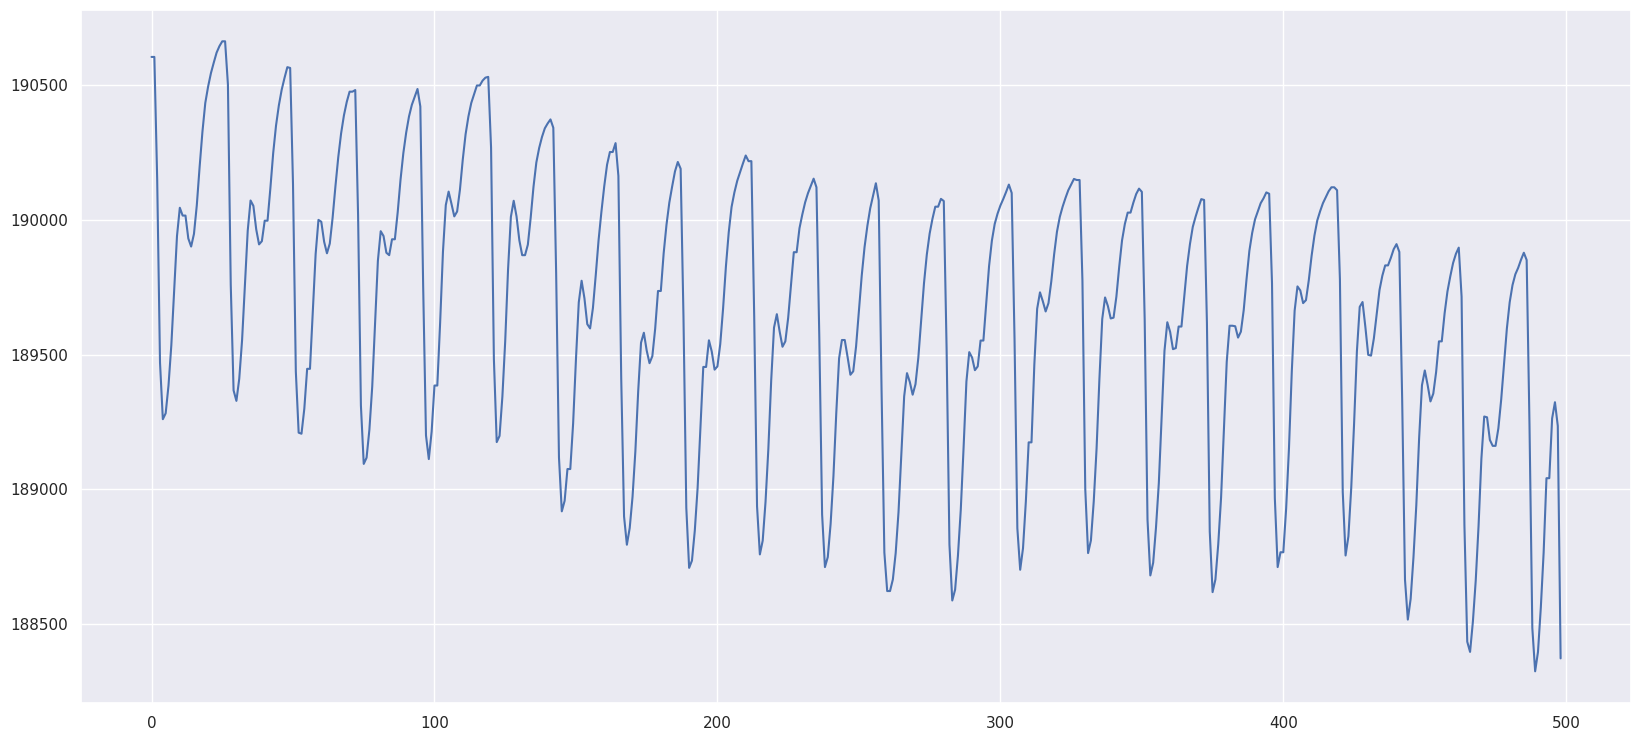

In [98]:
#plotting the graph 
plt.plot(smoothening_1)
plt.plot()

In [99]:
channel = smoothening_1
individual_wavelet_s1, GMinima_s1, GMaxima_s1, LMinima_s1, LMaxima_s1 = Golbal_Local_optima(channel)


In [100]:
print(individual_wavelet_s1)

[[4, 30], [30, 53], [53, 75], [75, 98], [98, 122], [122, 145], [145, 168], [168, 190], [190, 215], [215, 238], [238, 260], [260, 283], [283, 307], [307, 331], [331, 353], [353, 375], [375, 398], [398, 422], [422, 444], [444, 466], [466, 489]]


In [101]:
print(GMinima_s1)
#[0, 19, 46, 71, 98, 125, 154, 181, 209, 236, 264, 292, 319, 347, 373, 399, 427, 454, 480]

[4, 30, 53, 75, 98, 122, 145, 168, 190, 215, 238, 260, 283, 307, 331, 353, 375, 398, 422, 444, 466, 489]


In [102]:
print(GMaxima_s1)
#[13, 39, 66, 92, 120, 147, 176, 202, 230, 258, 286, 314, 340, 367, 394, 422, 449, 475, 497]

[25, 48, 72, 94, 119, 141, 164, 186, 210, 234, 256, 279, 303, 326, 349, 371, 394, 417, 440, 462, 485]


In [103]:
print(LMinima_s1)
#[1, 9, 25, 57, 72, 79, 88, 103, 119, 137, 152, 169, 186, 203, 216, 220, 237, 244, 255, 272, 288, 306, 324, 342, 354, 362, 381, 400, 419, 439, 461, 463, 484, 488]

[11, 14, 38, 41, 56, 62, 71, 84, 86, 101, 107, 116, 131, 132, 148, 155, 163, 176, 180, 196, 199, 211, 223, 228, 247, 261, 269, 278, 291, 294, 311, 316, 327, 339, 346, 361, 364, 384, 400, 407, 431, 437, 452, 456, 474, 475, 494]


In [104]:
print(LMaxima_s1)
#[8, 24, 56, 78, 87, 102, 118, 136, 168, 185, 214, 219, 242, 254, 271, 305, 323, 353, 361, 380, 418, 438, 459, 462, 483, 487]

[10, 35, 40, 55, 59, 70, 81, 85, 100, 105, 115, 128, 147, 152, 162, 174, 179, 195, 197, 221, 227, 244, 267, 277, 289, 293, 310, 314, 337, 345, 359, 363, 381, 399, 405, 428, 436, 450, 455, 471, 493, 496]


In [105]:
smoothen_LMAX_1 = sm(individual_wavelet_s1, LMaxima_s1 )
smoothen_LMAX_1

[1, 2, 3, 2, 3, 1, 3, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1]

In [106]:
smoothen_LMIN_1 = sm(individual_wavelet_s1, LMinima_s1 )
smoothen_LMIN_1

[2, 2, 3, 2, 3, 2, 3, 2, 3, 2, 1, 3, 2, 3, 2, 2, 1, 2, 2, 2, 2]

In [107]:
# plotting the graph from column "A" with smoothening_1

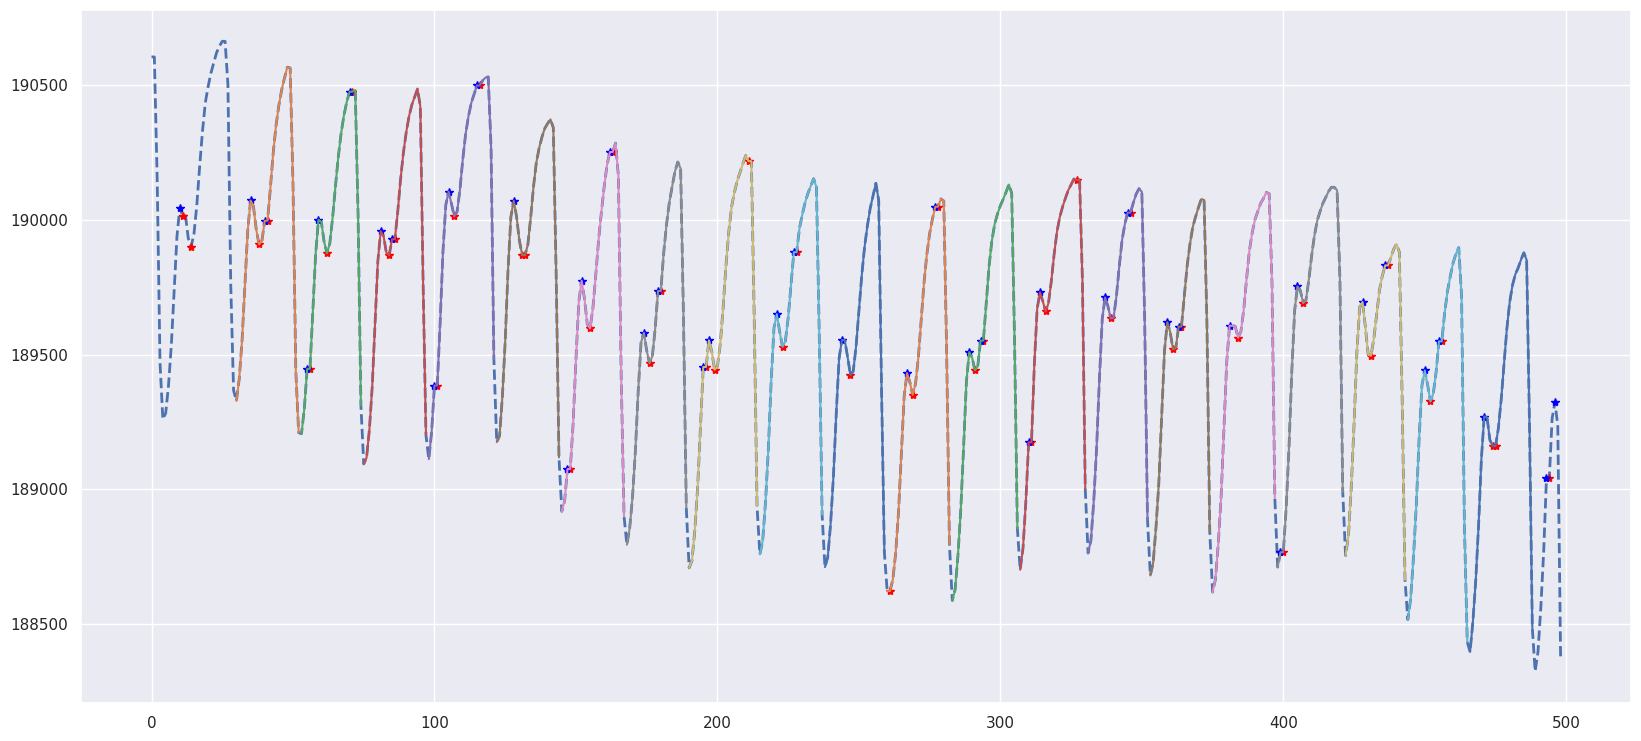

In [108]:
plt.plot(df['B'], linestyle='dashed', linewidth = 2) #marker='o', markerfacecolor='violet', markersize=2

#for i in LMinima:
plt.plot(LMinima_s1, smoothening_1[LMinima_s1], '*', color = 'Red')

#for j in LMaxima:
plt.plot(LMaxima_s1, smoothening_1[LMaxima_s1], '*', color = 'Blue')

for i in range(1, len(individual_wavelet_s1)):
    plt.plot(range(individual_wavelet_s1[i][0], individual_wavelet_s1[i][1]),smoothening_1.values[individual_wavelet_s1[i][0]:individual_wavelet_s1[i][1]])

#plt.plot(df['A'], linestyle='dashed', linewidth = 2) #marker='o', markerfacecolor='violet', markersize=2


In [109]:
#creating the dataframe

In [110]:
df_sw1_1 = pd.DataFrame({'individual_wavelet': individual_wavelet_s1})
df_sw1_2 = pd.DataFrame({'Local_Maxima_fluct': smoothen_LMAX_1})
df_sw1_3 = pd.DataFrame({'Local_minima_fluct': smoothen_LMIN_1})

In [111]:
smothen_ind_1 = [df_sw1_1, df_sw1_2, df_sw1_3]
smothen_ind_flt_1 = pd.concat(smothen_ind_1,axis = 1)
smothen_ind_flt_1

,individual_wavelet,Local_Maxima_fluct,Local_minima_fluct
0,"[4, 30]",1,2
1,"[30, 53]",2,2
2,"[53, 75]",3,3
3,"[75, 98]",2,2
4,"[98, 122]",3,3
5,"[122, 145]",1,2
6,"[145, 168]",3,3
7,"[168, 190]",2,2
8,"[190, 215]",2,3
9,"[215, 238]",2,2


In [112]:
# count of Local minima and maxima presents in smoothening_1

In [113]:
count_select_data_1 = smothen_ind_flt_1.loc[(smothen_ind_flt_1['Local_Maxima_fluct']==1) & (smothen_ind_flt_1['Local_minima_fluct']==1)]
count_select_data_1

,individual_wavelet,Local_Maxima_fluct,Local_minima_fluct
10,"[238, 260]",1,1
16,"[375, 398]",1,1


In [114]:
df_sw1_1.count() # count of individual fluct

individual_wavelet    21
dtype: int64

In [115]:
count_select_data_1.count()

individual_wavelet    2
Local_Maxima_fluct    2
Local_minima_fluct    2
dtype: int64

**Observation :**

From the smoothening of window size 1, we get six Local minima and maxima, which has both 1's. 

window size 1 == normal data (without smoothening)

====================================================================================================

## 4. Sub-Task : 
After smoothing the graph, check if only one local minima and local maxima are present.

**Smothening _ 4 : **

overall, only one local maxima and minima is presents between every individual Global Minima. And other are Zero.

So, this smoothening_4 is not applicable.

**Smoothening _ 3 : **

overall, only one local maxima and minima is presents between every individual Global Minima. And other are Zero.

So, this smoothening_3 is not applicable.

**Smoothening _ 2 : **

overall, three local maxima and minima is presents between every individual Global Minima. And other are Zero.

So, this smoothening_2 is not applicable.

**Smoothening _ 1 : **

Smoothening _ 1 == no smoothening.(original data)

overall, six local maxima and minima is presents between every individual Global Minima, which has both 1's. 
Other has more than one Local maxima and minima.

Smoothening _ 1 gives atleast one Local minima and maxima in all individual fluct of Global Minima.


# ***Therefore, Smoothening _ 1 satisfice the condition, which presents only one Local minima and Maxima, without getting zero. ***



#smoothening with 90% of individual wavelet

In [116]:
def optimal_case():

    if len(count_select_data) >= ninty_percent_data:
        print("overall ninty_percent_data of individual wavelet :- ", ninty_percent_data, "out of", len(individual_wavelet), 'is best.' )
        print("no. of optimal case presents :- ",len(count_select_data))
        print("-----------------------------------------------------------------------------", '\n')
        print("count_select_data before smoothening", '\n')
        print(count_select_data)

    elif len(count_select_data_3) >= ninty_percent_data:
        print("overall ninty_percent_data of individual wavelet :- ", ninty_percent_data, "out of", len(individual_wavelet), 'is best.' )
        print("no. of optimal case presents :- ",len(count_select_data_3))
        print("-----------------------------------------------------------------------------", '\n')
        print("count_select_data after smoothening of window size is 3", '\n')
        print(count_select_data_3)

    elif len(count_select_data_2) >= ninty_percent_data:
        print("overall ninty_percent_data of individual wavelet :- ", ninty_percent_data, "out of", len(individual_wavelet), 'is best.' )
        print("no. of optimal case presents :- ",len(count_select_data_2))
        print("-----------------------------------------------------------------------------", '\n')
        print("count_select_data after smoothening of window size is 2", '\n')
        print(count_select_data_2)

    elif len(count_select_data_4) >= ninty_percent_data:
        print("overall ninty_percent_data of individual wavelet :- ", ninty_percent_data, "out of", len(individual_wavelet), 'is best.' )
        print("no. of optimal case presents :- ",len(count_select_data_4))
        print("-----------------------------------------------------------------------------", '\n')
        print("count_select_data after smoothening of window size is 4", '\n')
        print(count_select_data_4)
        
    else:
        if (len(count_select_data_4) >= len(count_select_data_3)) and (len(count_select_data_4) >= len(count_select_data_2)) and (len(count_select_data_4) >= len(count_select_data)):
              largest = print("count_select_data_4, optimal case after smoothening_4 : ", '\n', count_select_data_4)

        elif (len(count_select_data_3) >= len(count_select_data_4)) and (len(count_select_data_3) >= len(count_select_data_2)) and (len(count_select_data_3) >= len(count_select_data)):
              largest = print(" count_select_data_3,optimal case after smoothening_3 : ", '\n', count_select_data_3)

        elif (len(count_select_data_2) >= len(count_select_data_4)) and (len(count_select_data_2) >= len(count_select_data_3)) and (len(count_select_data_2) >= len(count_select_data)):
              largest = print(" count_select_data_2, optimal case with smoothening_2 : ", '\n', count_select_data_2)

        else:
              largest = print("count_select_data, optimal case before smoothening: ", '\n', count_select_data)

In [117]:
optimal_case()

overall ninty_percent_data of individual wavelet :-  19 out of 21 is best.
no. of optimal case presents :-  21
----------------------------------------------------------------------------- 

count_select_data after smoothening of window size is 3 

   individual_fluct  Local_Maxima_fluct  Local_minima_fluct
0           [6, 31]                   1                   1
1          [31, 54]                   1                   1
2          [54, 77]                   1                   1
3          [77, 99]                   1                   1
4         [99, 124]                   1                   1
5        [124, 147]                   1                   1
6        [147, 169]                   1                   1
7        [169, 192]                   1                   1
8        [192, 216]                   1                   1
9        [216, 240]                   1                   1
10       [240, 262]                   1                   1
11       [262, 285]            